### Importing libraries from excel 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as unc
from uncertainties import unumpy
%matplotlib inline
plt.rcParams['text.usetex'] = True

### Importing raw data from excel 

In [49]:
df = pd.read_excel("./data.xlsx")# data in cm
df_1500 = pd.read_excel("./data_1500.xlsx")
df = df.mul(1e-2)
df_1500 = df_1500.mul(1e-2)# data in m
x = np.arange(0,21,1)
x_1500 = np.arange(0,20,0.2)
print(x_1500.shape)
pInf = unc.ufloat(101325, 0) #Pascals
T = unc.ufloat(273+29.7,0.1) 
R = 287
rho_eth = 789 #kg/m3
rho_air = pInf/R/T #kg/m3
print(rho_air)
g = 9.81 

(100,)
1.1663+/-0.0004


### Calculating pressure from height

**Assumptions:** 
1. Error in Pressure Measurement = 1 Pa
2. Error in Temprature Measurement = 0.1 Degree Celsius
3. Error in Barometer Measurement = 0

In [70]:
P_error = np.ones_like(df.Centerline)*10
P_st = rho_eth*g*27.3e-2*0.5
df['P_Centerline'] = P_st - unumpy.uarray(rho_eth*g*df.Centerline*0.5, P_error)
df['P_0D'] = P_st - unumpy.uarray(rho_eth*g*df.D0*0.5,P_error)
df['P_3D'] = P_st - unumpy.uarray(rho_eth*g*df.D3*0.5,P_error)
df['P_6D'] = P_st - unumpy.uarray(rho_eth*g*df.D6*0.5,P_error)
P_error = np.ones_like(df_1500.C_1500)*10
df_1500['P_Centerline_1500'] = P_st - unumpy.uarray(rho_eth*g*df_1500.C_1500*0.5, P_error)
df_1500['P_3D_1500'] = P_st - unumpy.uarray(rho_eth*g*df_1500.D3_1500*0.5, P_error)
df_1500['P_6D_1500'] = P_st - unumpy.uarray(rho_eth*g*df_1500.D6_1500*0.5, P_error)
df_1500['P_10D_1500'] = P_st - unumpy.uarray(rho_eth*g*df_1500.D10_1500*0.5, P_error)

### Calculating velocity from pressure

In [71]:
df['V_Centerline'] = unumpy.sqrt(2*df.P_Centerline/rho_air)
df['V_0D'] = unumpy.sqrt(2*df.P_0D/rho_air)
df['V_3D'] = unumpy.sqrt(2*df.P_3D/rho_air)
df['V_6D'] = unumpy.sqrt(2*df.P_6D/rho_air)
df_1500['V_C1500'] = unumpy.sqrt(2*df_1500.P_Centerline_1500/rho_air)
df_1500['V_3D_1500'] = unumpy.sqrt(2*df_1500.P_3D_1500/rho_air)
df_1500['V_6D_1500'] = unumpy.sqrt(2*df_1500.P_6D_1500/rho_air)
df_1500['V_10D_1500'] = unumpy.sqrt(2*df_1500.P_10D_1500/rho_air)

### Non-dimensionalizing Velocity

In [72]:
V0 = df.V_Centerline[0]
df['V_Centerline_ND'] = df.V_Centerline/V0
df['V_0D_ND'] = df.V_0D/V0
df['V_3D_ND'] = df.V_3D/V0
df['V_6D_ND'] = df.V_6D/V0
V0_1500 = df_1500.V_C1500[0]
df_1500['V_C_1500_ND'] = df_1500.V_C1500/V0_1500
df_1500['V_3D_1500_ND'] = df_1500.V_3D_1500/V0_1500
df_1500['V_6D_1500_ND'] = df_1500.V_6D_1500/V0_1500
df_1500['V_10D_1500_ND'] = df_1500.V_10D_1500/V0_1500
print(df.shape)
print(df_1500.shape)

(21, 17)
(100, 17)


### Velocity along the Centerline

Text(0.5, 1.0, 'Plot of Non-Dimensional Velocity along the Centerline')

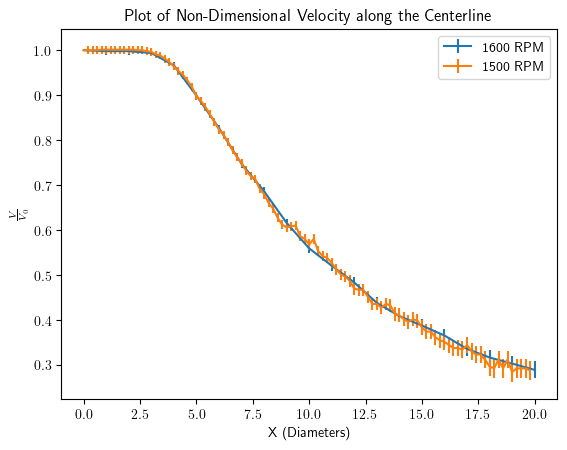

In [73]:
yerr = unumpy.std_devs(df.V_Centerline_ND)
yerr_1500 = unumpy.std_devs(df_1500.V_C_1500_ND)
plt.errorbar(x, unumpy.nominal_values(df.V_Centerline_ND), yerr = yerr, label='1600 RPM')
plt.errorbar(x_1500, unumpy.nominal_values(df_1500.V_C_1500_ND), yerr = yerr_1500, label='1500 RPM')
plt.xlabel(r'X (Diameters)')
plt.ylabel(r'$\frac{V}{V_0}$')
plt.legend()
plt.title("Plot of Non-Dimensional Velocity along the Centerline")

### Velocity Profile along the axial direction at 0.1D, 3D and 6D distance

Text(0.5, 0.98, 'Non-dimensional Velocity along the axial direction')

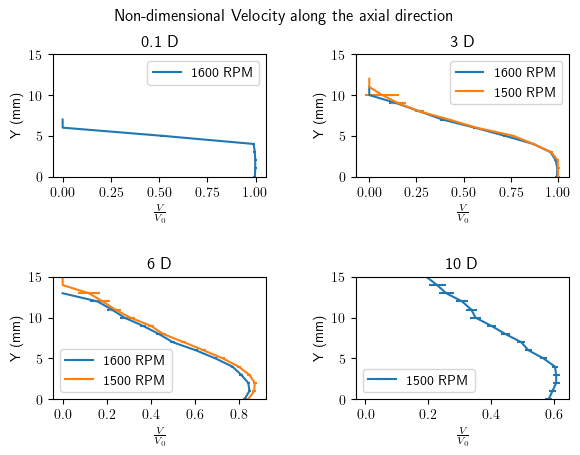

In [74]:
x_1500 = np.arange(0,100,1)
plt.subplot(2,2,1)
plt.errorbar(unumpy.nominal_values(df.V_0D_ND), x, xerr= unumpy.std_devs(df.V_0D_ND), label='1600 RPM')
plt.xlabel(r'$\frac{V}{V_0}$')
plt.ylabel(r'Y (mm)')
plt.title("0.1 D")
plt.legend()
#plt.xlim([0,1])
plt.ylim([0,15])

plt.subplot(2,2,2)
plt.errorbar(unumpy.nominal_values(df.V_3D_ND), x,  xerr= unumpy.std_devs(df.V_3D_ND), label='1600 RPM')
plt.errorbar(unumpy.nominal_values(df_1500.V_3D_1500_ND), x_1500,  xerr= unumpy.std_devs(df_1500.V_3D_1500_ND), label='1500 RPM')
plt.xlabel(r'$\frac{V}{V_0}$')
plt.ylabel(r'Y (mm)')
#plt.xlim([0,1])
plt.legend()
plt.ylim([0,15])
plt.title("3 D")


plt.subplot(2,2,3)
plt.errorbar(unumpy.nominal_values(df.V_6D_ND), x,  xerr= unumpy.std_devs(df.V_6D_ND), label='1600 RPM')
plt.errorbar(unumpy.nominal_values(df_1500.V_6D_1500_ND), x_1500,  xerr= unumpy.std_devs(df_1500.V_6D_1500_ND), label='1500 RPM')
plt.xlabel(r'$\frac{V}{V_0}$')
plt.ylabel(r'Y (mm)')
#plt.xlim([0,1])
plt.ylim([0,15])
plt.legend()
plt.title("6 D")

plt.subplot(2,2,4)
plt.errorbar(unumpy.nominal_values(df_1500.V_10D_1500_ND), x_1500,  xerr= unumpy.std_devs(df_1500.V_10D_1500_ND), label='1500 RPM')
plt.xlabel(r'$\frac{V}{V_0}$')
plt.ylabel(r'Y (mm)')
#plt.xlim([0,1])
plt.ylim([0,15])
plt.legend()
plt.title("10 D")

plt.gcf().tight_layout(pad = 2.5)
plt.suptitle("Non-dimensional Velocity along the axial direction") 
#plt.show()

### Mass Flux along the centerline

Text(0.5, 1.0, 'Plot of Mass flux along the Centerline')

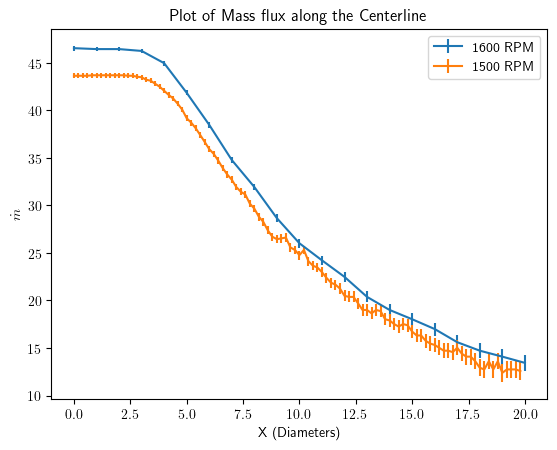

In [75]:
x_1500 = np.arange(0,20,0.2)
df['mass_flux'] = df.V_Centerline * rho_air
df_1500['mass_flux'] = df_1500.V_C1500 *rho_air
plt.errorbar(x, unumpy.nominal_values(df.mass_flux), yerr = unumpy.std_devs(df.mass_flux), label='1600 RPM')
plt.errorbar(x_1500, unumpy.nominal_values(df_1500.mass_flux), yerr = unumpy.std_devs(df_1500.mass_flux), label='1500 RPM')
plt.xlabel(r'X (Diameters)')
plt.ylabel(r'$\dot{m}$')
plt.legend()
plt.title("Plot of Mass flux along the Centerline")

### Comparision with the theoritical prediction

Text(0.5, 1.0, 'Plot of Non-Dimensional Velocity along the Centerline')

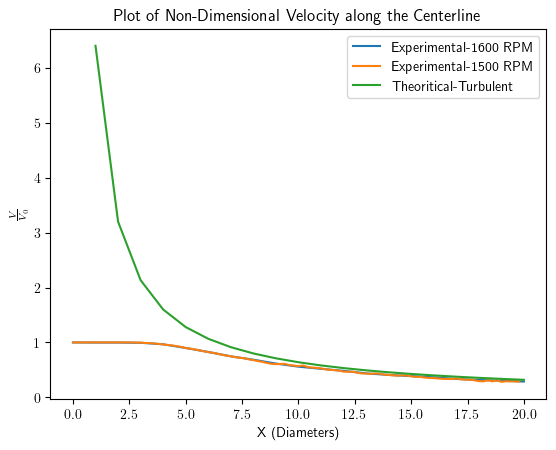

In [76]:
thry = np.append([None],6.4/x[1:]) # Ref: https://ocw.snu.ac.kr/sites/default/files/NOTE/7425.pdf
plt.plot(x, unumpy.nominal_values(df.V_Centerline_ND), label = 'Experimental-1600 RPM')
plt.plot(x_1500, unumpy.nominal_values(df_1500.V_C_1500_ND), label = 'Experimental-1500 RPM')
plt.plot(x, unumpy.nominal_values(thry), label = 'Theoritical-Turbulent')
plt.xlabel(r'X (Diameters)')
plt.ylabel(r'$\frac{V}{V_0}$')
plt.legend()
plt.title("Plot of Non-Dimensional Velocity along the Centerline")

### Results
1. The experimental value of the Non-Dimensional Velocity at both 1500 RPM and 1600 RPM with the theoretical model of turbulent free jet in the fully developed region.
2. The non-dimensional velocity at both the RPMs are coinciding at 3 Diameters and 6 Diameters away from the outlet of the jet.